In [14]:
import numpy as np
from numpy import linalg as la
from scipy import sparse
import pandas as pd
import seaborn as sns
import src.normFunction as nf
import src.cg as CG
import scipy.sparse as sparse
from src.utility import make_plot

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
PATH = "./matrix/"

In [17]:
M1 = np.loadtxt(PATH + 'M1.txt')
M2 = np.loadtxt(PATH + 'M2.txt')
M3 = np.loadtxt(PATH + 'M3.txt')
M4 = np.loadtxt(PATH + 'M4.txt')
M5 = np.loadtxt(PATH + 'M5.txt')

# Experiments on Matrix M1

In [18]:
errorsCG = []
gradientsCG = []

In [19]:
f = nf.normFunction(M1)

In [20]:
initial_vector = f.init_x()

In [21]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = True)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

Iteration number 1, -f(x) = 489.6015, gradientNorm = 79.720603
Iteration number 2, -f(x) = 768.7674, gradientNorm = 33.517512
Iteration number 3, -f(x) = 863.9895, gradientNorm = 16.067030
Iteration number 4, -f(x) = 907.3803, gradientNorm = 7.920854
Iteration number 5, -f(x) = 922.1245, gradientNorm = 4.150512
Iteration number 6, -f(x) = 928.6215, gradientNorm = 3.208507
Iteration number 7, -f(x) = 935.0323, gradientNorm = 3.230051
Iteration number 8, -f(x) = 945.5795, gradientNorm = 2.974527
Iteration number 9, -f(x) = 959.5248, gradientNorm = 2.067408
Iteration number 10, -f(x) = 975.2639, gradientNorm = 1.103197
Iteration number 11, -f(x) = 988.2587, gradientNorm = 0.584867
Iteration number 12, -f(x) = 997.9386, gradientNorm = 0.329620
Iteration number 13, -f(x) = 1004.6815, gradientNorm = 0.189080
Iteration number 14, -f(x) = 1009.3185, gradientNorm = 0.107644
Iteration number 15, -f(x) = 1011.8642, gradientNorm = 0.053518
Iteration number 16, -f(x) = 1012.8586, gradientNorm = 0.0

In [22]:
norm = la.norm(M1, ord=2) ** 2

In [23]:
# Norm and errors SGD
normsCG = np.array(normsCG)
gradientsCG.insert(0,np.array(gradientCG))
size1 = normsCG.size

In [24]:
normvec = np.ones(size1) * norm
errorsCG.insert(0, (abs(normsCG - normvec) / abs(normvec)))

In [25]:
errorsCG[-1][-1]

8.474526585860747e-11

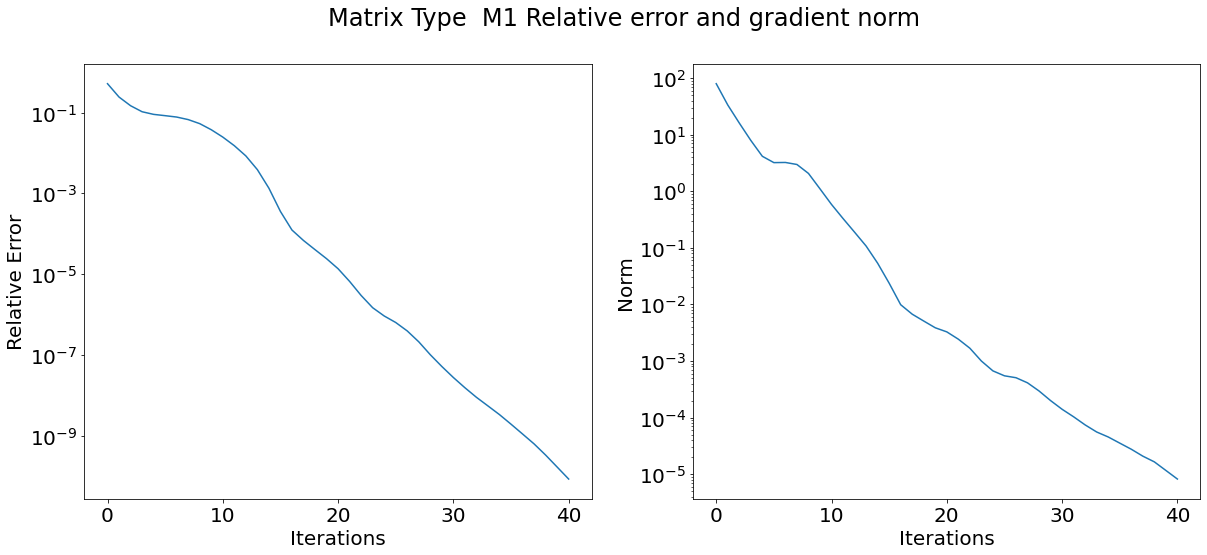

In [26]:
make_plot(gradientsCG, errorsCG,type='M1', experiment_name='exp1-M1-CG-PR')

In [27]:
%%timeit -r 100 -n 10
# Optimizer SGD
f = nf.normFunction(M1)
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

KeyboardInterrupt: 

In [15]:
from scipy.optimize import minimize

In [16]:
%%timeit -r 100 -n 10
res = minimize(f.func_, initial_vector, method='CG', jac=f.func_grad_, tol=1e-5, options = {'maxiter' : 500})
value = -res.fun

5.56 ms ± 1.37 ms per loop (mean ± std. dev. of 100 runs, 10 loops each)


# Experiments on Matrix M2

In [28]:
errorsCG = []
gradientsCG = []

In [29]:
f = nf.normFunction(M2)

In [30]:
initial_vector = f.init_x()

In [31]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = True)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

Iteration number 1, -f(x) = 2055.8574, gradientNorm = 130.512945
Iteration number 2, -f(x) = 2308.2789, gradientNorm = 64.022998
Iteration number 3, -f(x) = 2412.8573, gradientNorm = 33.259474
Iteration number 4, -f(x) = 2458.6504, gradientNorm = 21.819724
Iteration number 5, -f(x) = 2507.2867, gradientNorm = 18.395368
Iteration number 6, -f(x) = 2555.5968, gradientNorm = 8.766356
Iteration number 7, -f(x) = 2579.3947, gradientNorm = 5.235962
Iteration number 8, -f(x) = 2597.2601, gradientNorm = 3.458118
Iteration number 9, -f(x) = 2610.8257, gradientNorm = 2.266786
Iteration number 10, -f(x) = 2619.5230, gradientNorm = 1.500657
Iteration number 11, -f(x) = 2626.2307, gradientNorm = 1.125472
Iteration number 12, -f(x) = 2633.2789, gradientNorm = 0.861481
Iteration number 13, -f(x) = 2638.5260, gradientNorm = 0.473556
Iteration number 14, -f(x) = 2641.2642, gradientNorm = 0.250899
Iteration number 15, -f(x) = 2642.3601, gradientNorm = 0.123743
Iteration number 16, -f(x) = 2642.6449, gra

In [32]:
norm = la.norm(M2, ord=2) ** 2

In [33]:
# Norm and errors SGD
normsCG = np.array(normsCG)
gradientsCG.insert(0,np.array(gradientCG))
size1 = normsCG.size

In [34]:
normvec = np.ones(size1) * norm
errorsCG.insert(0, (abs(normsCG - normvec) / abs(normvec)))

In [35]:
errorsCG[-1][-1]

2.241612355881263e-12

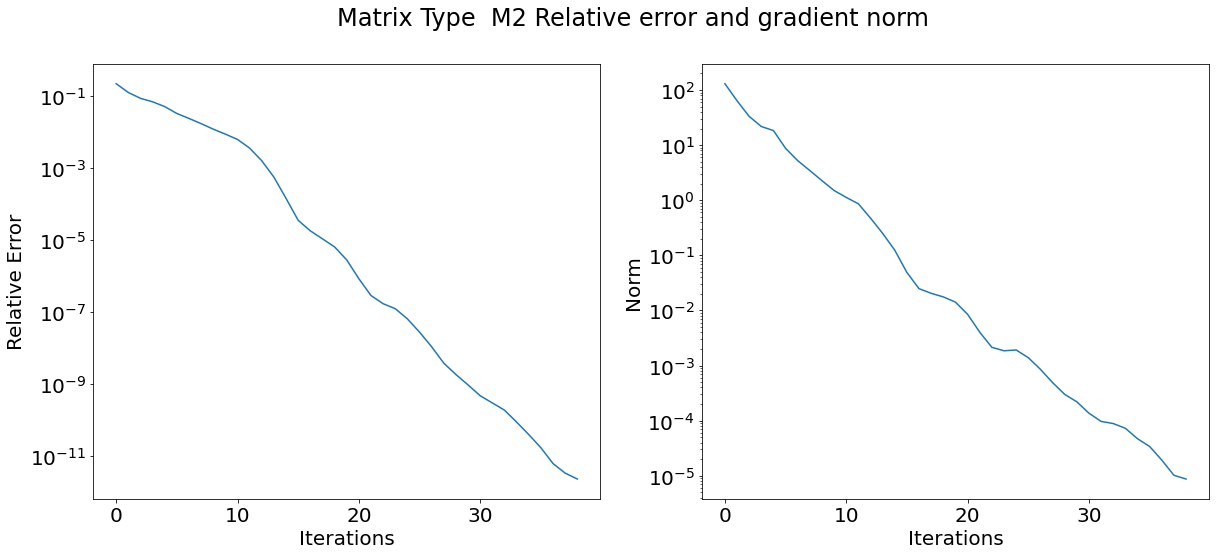

In [36]:
make_plot(gradientsCG, errorsCG,type='M2', experiment_name='exp1-M2-CG-PR')

In [26]:
%%timeit -r 100 -n 10
# Optimizer SGD
f = nf.normFunction(M2)
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

3.52 ms ± 152 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)


In [27]:
from scipy.optimize import minimize

In [28]:
%%timeit -r 100 -n 10
res = minimize(f.func_, initial_vector, method='CG', jac=f.func_grad_, tol=1e-5, options = {'maxiter' : 500})
value = -res.fun

2.71 ms ± 89.7 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)


# Experiments on Matrix M3

In [29]:
errorsCG = []
gradientsCG = []

In [30]:
f = nf.normFunction(M3)

In [31]:
initial_vector = f.init_x()

In [32]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = True)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

Iteration number 1, -f(x) = 529.4073, gradientNorm = 43.778258
Iteration number 2, -f(x) = 608.1346, gradientNorm = 18.878857
Iteration number 3, -f(x) = 636.5345, gradientNorm = 11.440223
Iteration number 4, -f(x) = 656.3212, gradientNorm = 6.889813
Iteration number 5, -f(x) = 667.3282, gradientNorm = 4.280260
Iteration number 6, -f(x) = 673.5278, gradientNorm = 2.109372
Iteration number 7, -f(x) = 675.7713, gradientNorm = 1.143920
Iteration number 8, -f(x) = 676.7750, gradientNorm = 0.654872
Iteration number 9, -f(x) = 677.0474, gradientNorm = 0.356366
Iteration number 10, -f(x) = 677.1471, gradientNorm = 0.228995
Iteration number 11, -f(x) = 677.1998, gradientNorm = 0.176125
Iteration number 12, -f(x) = 677.2249, gradientNorm = 0.117572
Iteration number 13, -f(x) = 677.2394, gradientNorm = 0.103020
Iteration number 14, -f(x) = 677.2508, gradientNorm = 0.074405
Iteration number 15, -f(x) = 677.2546, gradientNorm = 0.041062
Iteration number 16, -f(x) = 677.2560, gradientNorm = 0.02197

In [33]:
norm = la.norm(M3, ord=2) ** 2

In [34]:
# Norm and errors SGD
normsCG = np.array(normsCG)
gradientsCG.insert(0,np.array(gradientCG))
size1 = normsCG.size

In [35]:
normvec = np.ones(size1) * norm
errorsCG.insert(0, (abs(normsCG - normvec) / abs(normvec)))

In [36]:
errorsCG[-1][-1]

3.6829318450607613e-13

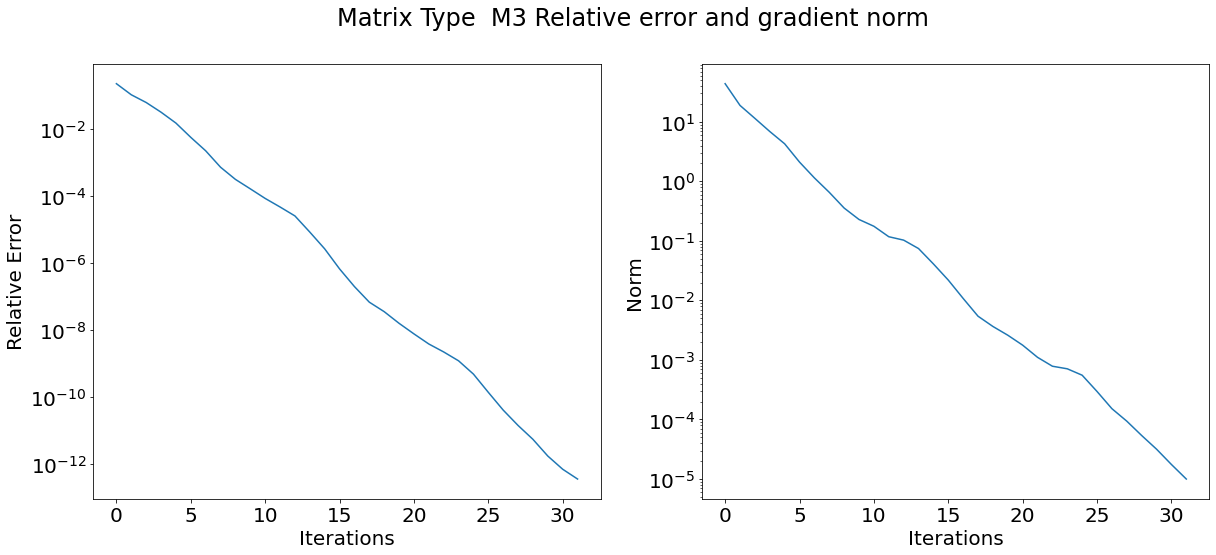

In [37]:
make_plot(gradientsCG, errorsCG, type='M3', experiment_name='exp1-M3-CG-PR')

In [38]:
%%timeit -r 100 -n 10
# Optimizer SGD
f = nf.normFunction(M3)
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

3.02 ms ± 168 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)


In [39]:
from scipy.optimize import minimize

In [40]:
%%timeit -r 100 -n 10
res = minimize(f.func_, initial_vector, method='CG', jac=f.func_grad_, tol=1e-5, options = {'maxiter' : 500})
value = -res.fun

2.7 ms ± 127 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)


# Experiments on Matrix M4

In [41]:
errorsCG = []
gradientsCG = []

In [42]:
f = nf.normFunction(M4)

In [43]:
initial_vector = f.init_x()

In [44]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = True)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

Iteration number 1, -f(x) = 58.8900, gradientNorm = 27.282867
Iteration number 2, -f(x) = 2172.4868, gradientNorm = 3.567652
Iteration number 3, -f(x) = 2375.5173, gradientNorm = 1.765734
Iteration number 4, -f(x) = 2505.3227, gradientNorm = 0.844879
Iteration number 5, -f(x) = 2547.4748, gradientNorm = 0.495992
Iteration number 6, -f(x) = 2560.8843, gradientNorm = 0.533981
Iteration number 7, -f(x) = 2578.1115, gradientNorm = 0.341603
Iteration number 8, -f(x) = 2598.5813, gradientNorm = 0.263500
Iteration number 9, -f(x) = 2607.9222, gradientNorm = 0.276902
Iteration number 10, -f(x) = 2627.2753, gradientNorm = 0.157163
Iteration number 11, -f(x) = 2636.6258, gradientNorm = 0.113101
Iteration number 12, -f(x) = 2643.1892, gradientNorm = 0.060111
Iteration number 13, -f(x) = 2647.4464, gradientNorm = 0.040898
Iteration number 14, -f(x) = 2648.9330, gradientNorm = 0.020393
Iteration number 15, -f(x) = 2649.7996, gradientNorm = 0.013798
Iteration number 16, -f(x) = 2650.0837, gradientNo

In [45]:
norm = la.norm(M4, ord=2) ** 2

In [46]:
# Norm and errors SGD
normsCG = np.array(normsCG)
gradientsCG.insert(0,np.array(gradientCG))
size1 = normsCG.size

In [47]:
normvec = np.ones(size1) * norm
errorsCG.insert(0, (abs(normsCG - normvec) / abs(normvec)))

In [48]:
errorsCG[-1][-1]

2.266074691743132e-10

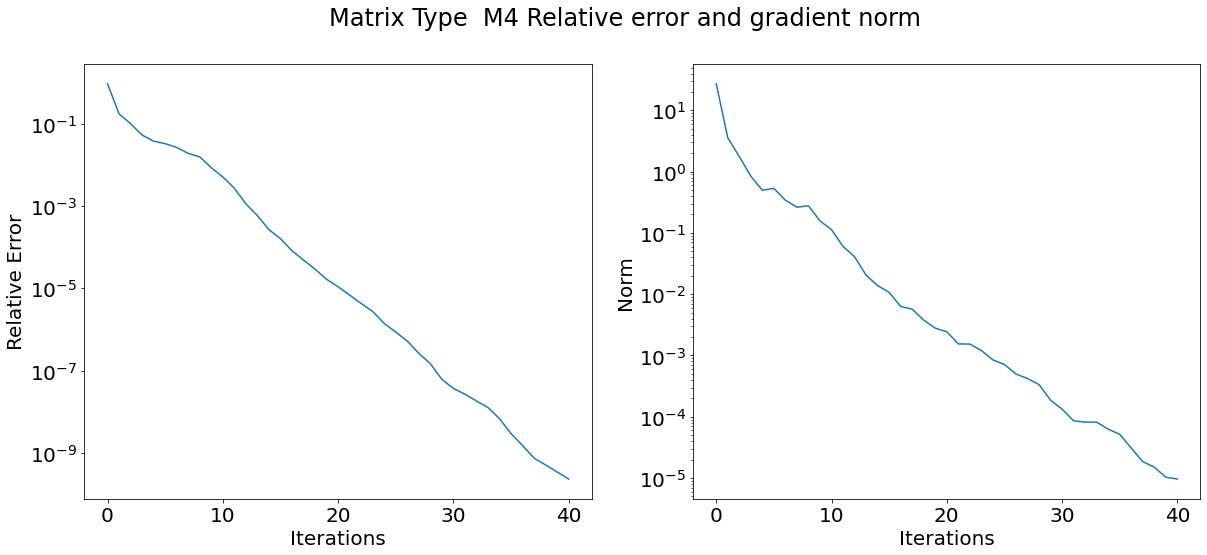

In [49]:
make_plot(gradientsCG, errorsCG, type='M4', experiment_name='exp1-M4-CG-PR')

In [ ]:
%%timeit -r 100 -n 10
# Optimizer SGD
f = nf.normFunction(M4)
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [ ]:
from scipy.optimize import minimize

In [ ]:
%%timeit -r 100 -n 10
res = minimize(f.func_, initial_vector, method='CG', jac=f.func_grad_, tol=1e-5, options = {'maxiter' : 500})
value = -res.fun

# Experiments on Matrix M5

In [ ]:
errorsCG = []
gradientsCG = []

In [ ]:
f = nf.normFunction(M5)

In [ ]:
initial_vector = f.init_x()

In [ ]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = True)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [ ]:
norm = la.norm(M5, ord=2) ** 2

In [ ]:
norm

In [ ]:
# Norm and errors SGD
normsCG = np.array(normsCG)
gradientsCG.insert(0,np.array(gradientCG))
size1 = normsCG.size

In [ ]:
normvec = np.ones(size1) * norm
errorsCG.insert(0, (abs(normsCG - normvec) / abs(normvec)))

In [ ]:
errorsCG[-1][-1]

In [ ]:
make_plot(gradientsCG, errorsCG, type='M5', experiment_name='exp1-M5-CG-PR')

In [ ]:
%%timeit -r 100 -n 10
# Optimizer SGD
f = nf.normFunction(M5)
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [ ]:
from scipy.optimize import minimize

In [ ]:
%%timeit -r 100 -n 10
res = minimize(f.func_, initial_vector, method='CG', jac=f.func_grad_, tol=1e-5, options = {'maxiter' : 500})
value = -res.fun